In [9]:
import pandas as p
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

In [10]:
# vamos começar trabalhando com as listas separadas por causa do tamanho total: milhões de linhas na tabela (uma para cada entrada na dívida em múltiplos anos) demandam memória demais

arquivos = glob.glob('n_prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['TIPO_PESSOA', 'DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])  # limitando as colunas para economizar memória
  lista.append(estado)

def filtraAno(ds, ano):
  filtro = ds['DATA_INSCRICAO'].str.contains(str(ano))
  ds = ds[filtro]
  return ds

n_prev2020 = filtraAno(p.concat(lista), 2020)

del lista


In [11]:
arquivos = glob.glob('prev/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['TIPO_PESSOA', 'DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])
  lista.append(estado)

prev2020 = filtraAno(p.concat(lista), 2020)

In [12]:
arquivos = glob.glob('fgts/*.csv')
lista = []
for f in arquivos:
  estado = p.read_csv(f, encoding='iso-8859-1', sep=';').filter(items=['TIPO_PESSOA', 'DATA_INSCRICAO', 'VALOR_CONSOLIDADO'])
  lista.append(estado)

fgts2020 = filtraAno(p.concat(lista), 2020)

In [13]:
divida2020 = p.concat([n_prev2020, prev2020, fgts2020]).groupby('TIPO_PESSOA').agg('sum')
divida2020.head()

,VALOR_CONSOLIDADO
TIPO_PESSOA,
Pessoa física,8.089900e+10
Pessoa jurídica,1.533225e+11


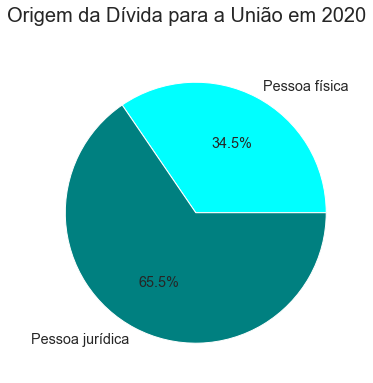

In [33]:
plt.figure(1, figsize=(10,6))
plt.suptitle('Origem da Dívida para a União em 2020', fontsize=20)

counts = divida2020.VALOR_CONSOLIDADO.sort_values()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['cyan', 'teal'], textprops={'size': 'larger'})

plt.show()